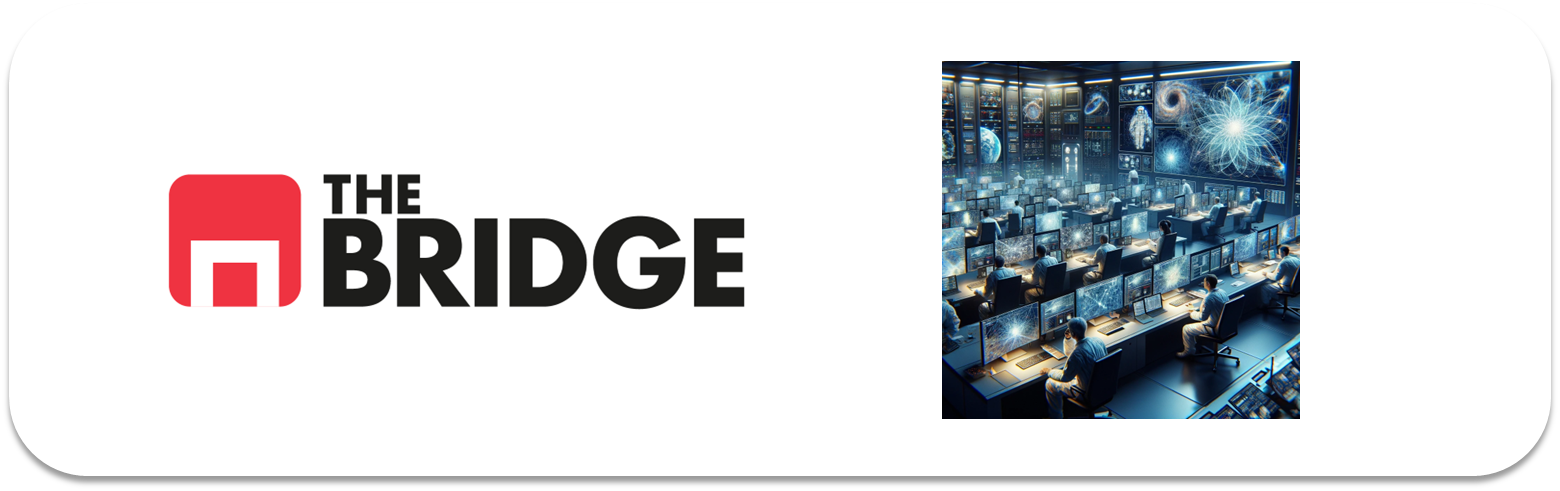

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [3]:
import bootcampviztools as bt
import cv2  # opencv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random

from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from skimage.io import imread
from tensorflow import keras

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [4]:
# Carga de datos
def read_data(directorios, reshape_dim=(32, 32)):
    X = []
    y = []
    mapa_imagen_fichero = []
    
    directorios = directorios if isinstance(directorios, list) else [directorios] if isinstance(directorios, str) else []
    
    for directorio in directorios:
        for file in os.listdir(directorio):
            image = imread('/'.join([directorio, file]))
            image = cv2.resize(image, reshape_dim)  # Redimensionamos las imágenes a 32x32
            X.append(image)
            y.append(file.split(".")[0])  # El nombre es la clase
            mapa_imagen_fichero.append(file)  # Esto para ver la imagen al completo con su resolución
    
    return np.array(X), np.array(y), mapa_imagen_fichero


In [5]:
PATH_DATA = "./data/"
directorios = [f"{PATH_DATA}github_train_{i}" for i in range(0,4)]
directorios

['./data/github_train_0',
 './data/github_train_1',
 './data/github_train_2',
 './data/github_train_3']

In [6]:
X_train, y_train, train_map = read_data(directorios)

In [11]:
directorios = [PATH_DATA + "github_test"]
X_test, y_test, test_map = read_data(directorios)

In [7]:
# Visualización de datos
X_train

array([[[[126, 100,  64],
         [118,  92,  53],
         [129, 104,  63],
         ...,
         [ 88,  69,  45],
         [ 98,  40,  25],
         [121,  72,  50]],

        [[113,  92,  61],
         [122, 102,  68],
         [131, 111,  75],
         ...,
         [131,  75,  57],
         [ 99,  53,  23],
         [ 99,  42,  22]],

        [[120,  96,  64],
         [133, 110,  74],
         [126, 103,  63],
         ...,
         [ 79,  25,  12],
         [ 50,  12,   2],
         [ 79,  32,   6]],

        ...,

        [[ 15,  15,  10],
         [ 82,  79,  69],
         [ 73,  67,  51],
         ...,
         [103,  95,  69],
         [ 83,  75,  53],
         [ 98,  92,  60]],

        [[ 97,  99,  88],
         [ 66,  63,  49],
         [ 80,  69,  51],
         ...,
         [ 70,  61,  39],
         [ 88,  79,  61],
         [100,  92,  68]],

        [[ 63,  55,  44],
         [ 64,  55,  39],
         [ 82,  71,  50],
         ...,
         [ 86,  72,  46],
        

In [8]:
X_train.shape

(4000, 32, 32, 3)

In [9]:
type(X_train[123])

numpy.ndarray

In [12]:
X_test.shape

(1000, 32, 32, 3)

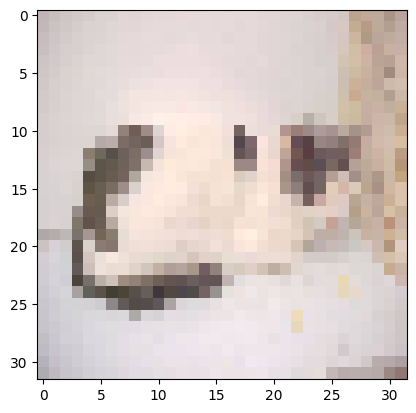

In [14]:
plt.imshow(X_test[2])

In [15]:
y_test[2]

np.str_('cat')

In [16]:
def show_images_batch(pets, names=[], n_cols=5, size_scale=2):
    n_rows = ((len(pets) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1 * size_scale))
    for index, pet in enumerate(pets):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(pet, cmap="Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

In [17]:
def show_images_files(pets, names=[], n_cols=5, size_scale=2, train=True, indice=0):
    n_rows = ((len(pets) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1 * size_scale))
    for index, filepet in enumerate(pets):
        plt.subplot(n_rows, n_cols, index + 1)
        if train:
            pet = imread(PATH_DATA + f"github_train_{indice}/" + filepet)
        else:
            pet = imread(PATH_DATA + "github_test/" + filepet)
        plt.imshow(pet, cmap="Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

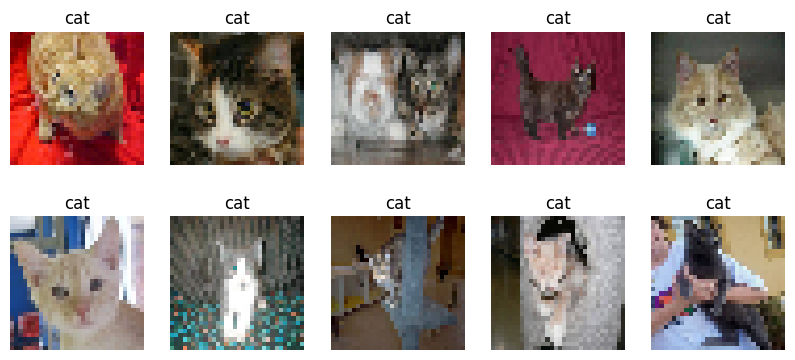

In [19]:
indices = np.random.randint(100,300,10)
show_images_batch(X_train[indices], names = y_train[indices])

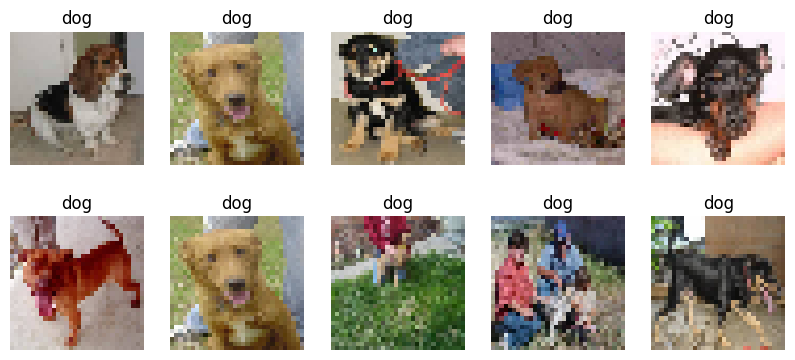

In [20]:
indices = np.random.randint(2000,2300,10)
show_images_batch(X_train[indices], names= y_train[indices])

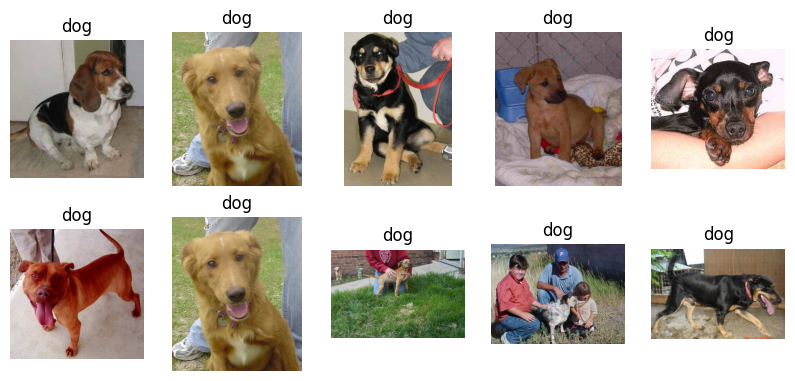

In [22]:
show_images_files([train_map[i] for i in indices], names= y_train[indices], train=2, indice=2)

Mini EDa

In [25]:
pd.Series(y_train).value_counts(True)

cat    0.5
dog    0.5
Name: proportion, dtype: float64

In [26]:
X_train.shape

(4000, 32, 32, 3)

In [27]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Shuffle

In [29]:
def aplana_escala_gris(array_in, grises=True):
    def convertir_a_escala_de_grises(imagen_color):
        coefficients = np.array([0.2989, 0.5870, 0.1140])
        imagen_gris = np.dot(imagen_color[..., :3], coefficients)
        return imagen_gris

    if array_in.shape[-1] == 3 and grises:
        array_in = np.array([convertir_a_escala_de_grises(imagen) for imagen in array_in])
        return array_in.reshape(array_in.shape[0], -1)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_train_rf = aplana_escala_gris(X_train)
len(X_train_rf[0])

1024

In [33]:
from sklearn.utils import shuffle

In [34]:
X_train_rf_shuffled, y_train_shuffled = shuffle(X_train_rf, y_train, random_state = 42)

In [ ]:
y_train[0:10]

In [ ]:
y_train_shuffled[0:10]

In [35]:
rf_clf = RandomForestClassifier()
np.mean(cross_val_score(rf_clf,X_train_rf_shuffled, y_train_shuffled, cv = 5, scoring = "accuracy"))

np.float64(0.60825)

In [36]:
np.savez(PATH_DATA + "data.npz", X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

In [ ]:
data = np.load(PATH_DATA + "data.npz")

X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

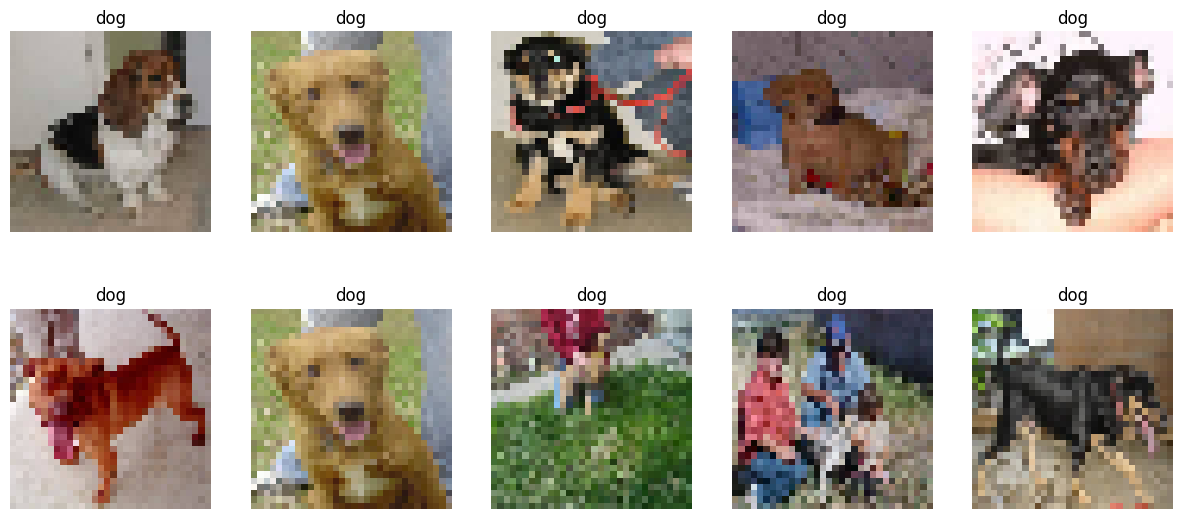

In [37]:
show_images_batch(X_train[indices], y_train[indices], size_scale = 3)

In [39]:
from tensorflow import keras

Si2 = 1024  # Define el número de unidades para la capa Dense

layers = [
    keras.layers.Conv2D(64, (3,3), activation='relu', padding="same", input_shape=(32,32,3)), # Padding "Valid" (
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"), # 2x2 -> A divide per 2 la resolución de cada dí
    keras.layers.Dropout(rate=0.25),

    keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"), # 16x16 -> 8x8
    keras.layers.Dropout(rate=0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(Si2, activation='relu'), # 1024 -> 32*32
    keras.layers.Dropout(rate=0.5),
    #keras.layers.Dense(2, activation='softmax') # -> loss = "sparse_categorical_crossentropy" (categorical_crossentropy)
    keras.layers.Dense(1, activation='sigmoid') # -> loss = "binary_crossentropy"
]

model = keras.Sequential(layers)

In [40]:
X_train.size

12288000

In [42]:
optimizer = keras.optimizers.Adam()

In [43]:
metrics = ["accuracy"]
loss = "binary_crossentropy"

In [44]:
bacth_size = 32
len(X_train)*0.8/bacth_size

100.0

In [46]:
num_epochs = 100

In [47]:
earlyS = keras.callbacks.EarlyStopping(patience = 10)

In [48]:
# Compilamos y mostramos un resumen del modelo

model.compile(optimizer= optimizer,
              loss= loss,
              metrics= metrics)

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,466,305 (32.30 MB)

 Trainable params: 8,466,305 (32.30 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
y_train[np.array([1,2,3560])]

array(['cat', 'cat', 'dog'], dtype='<U3')

In [52]:
y_train_num = np.array([0 if y == "cat" else 1 for y in y_train])

In [53]:
from tensorflow import keras

def prepare_model(resolution=(32,32)):
    layers = [
        keras.layers.Conv2D(64, (3,3), activation='relu', padding="same", input_shape=(32,32,3)),
        keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
        keras.layers.Dropout(rate=0.25),

        keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
        keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
        keras.layers.Dropout(rate=0.25),

        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ]

    model = keras.Sequential(layers)
    optimizer = keras.optimizers.Adam()
    metrics = ["accuracy"] # dataset equilibrado
    loss = "binary_crossentropy" # Es un clasificador binario
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=metrics)

    return model

In [56]:
from time import time

In [58]:
from time import time  # Importar la función time

model = prepare_model()
t_zero = time()  # Ahora time() está definido
history = model.fit(X_train,
                    y_train_num,
                    epochs=1,
                    batch_size= bacth_size,  # Corregí el nombre de la variable a "batch_size"
                    callbacks=[earlyS],
                    validation_split=0.2)
dur_epoca = time() - t_zero

100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.5823 - loss: 0.7192 - val_accuracy: 0.0000e+00 - val_loss: 0.7985


In [59]:
print(dur_epoca)

9.666139125823975


In [60]:
model = prepare_model()
t_zero = time()
history = model.fit(X_train,
                    y_train_num,
                    epochs=num_epochs,
                    batch_size= bacth_size,  # Corregí el nombre de la variable a "batch_size"
                    callbacks=[earlyS],
                    validation_split=0.2)
dur_epoca = time() - t_zero

Epoch 1/100


c:\Users\Lenovo\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.5646 - loss: 0.7138 - val_accuracy: 0.0000e+00 - val_loss: 0.9171
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.6335 - loss: 0.6413 - val_accuracy: 0.5400 - val_loss: 0.7106
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.6765 - loss: 0.5940 - val_accuracy: 0.3663 - val_loss: 0.8991
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.7168 - loss: 0.5537 - val_accuracy: 0.4025 - val_loss: 0.9316
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.7335 - loss: 0.5294 - val_accuracy: 0.2937 - val_loss: 1.1020
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.7497 - loss: 0.5124 - val_accuracy: 0.7525 - val_loss: 0.5261
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.7609 - loss: 0.4860 - val_accuracy: 0.6775 - val_loss: 0.6350
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.7897 - loss: 0.4559 - val_acc

In [62]:
y_test_sum = np.array([0 if y == "cat" else 1 for y in y_test])
results = model.evaluate(X_test,y_test_sum)
results

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8142 - loss: 0.4779


[0.685977578163147, 0.7279999852180481]

In [63]:
X_s,y_s = shuffle(X_train,y_train_num)

In [64]:
model = prepare_model()
t_zero = time()
history_shuffle = model.fit(X_s,
                            y_s,
                            epochs=num_epochs,
                            batch_size= bacth_size,
                            callbacks = [earlyS],
                            validation_split = 0.2)
dur_epoca = time()-t_zero

Epoch 1/100


c:\Users\Lenovo\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.5111 - loss: 0.7707 - val_accuracy: 0.4950 - val_loss: 0.6915
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.5690 - loss: 0.6733 - val_accuracy: 0.6612 - val_loss: 0.6468
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.6772 - loss: 0.6174 - val_accuracy: 0.6938 - val_loss: 0.5826
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.6805 - loss: 0.5929 - val_accuracy: 0.6800 - val_loss: 0.5762
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.7179 - loss: 0.5419 - val_accuracy: 0.7013 - val_loss: 0.5816
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.7234 - loss: 0.5546 - val_accuracy: 0.7075 - val_loss: 0.5448
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.7423 - loss: 0.5258 - val_accuracy: 0.7050 - val_loss: 0.5430
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.7548 - loss: 0.4948 - val_accuracy

In [65]:
y_test_num = np.array([0 if y == "cat" else 1 for y in y_test])
model.evaluate(X_test,y_test_num)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7499 - loss: 0.6313


[0.6521329283714294, 0.7480000257492065]

In [66]:
df_evol = pd.DataFrame(history.history)
df_evol_shuffle = pd.DataFrame(history_shuffle.history)

<Axes: >

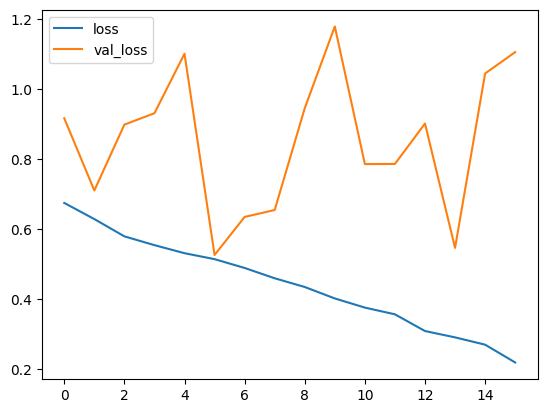

In [67]:
df_evol[["loss", "val_loss"]].plot()

<Axes: >

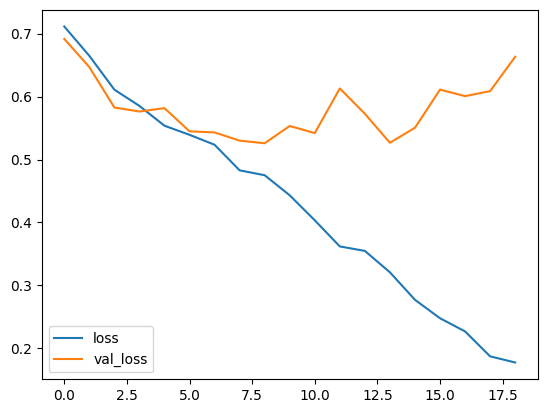

In [68]:
df_evol_shuffle[["loss", "val_loss"]].plot()

In [69]:
predictions = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [70]:
y_pred = ["dog" if prediction[0] > 0.5 else "cat" for prediction in model.predict(X_test)]
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

         cat       0.75      0.75      0.75       500
         dog       0.75      0.75      0.75       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



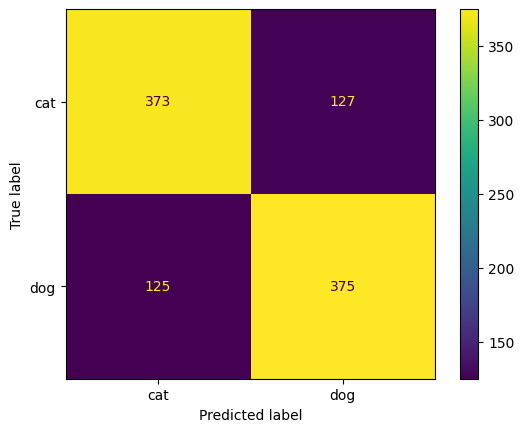

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [73]:
confianza = [ (1 - prediction[0]) if prediction[0] <= 0.5 else prediction[0] for prediction in model.predict(X_test)]
df_pred = pd.DataFrame({"ficheros": test_map, "True": [file.split(".")[0] for file in test_map], "Prediction": y_pred, "Confianza": confianza})
df_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,ficheros,True,Prediction,Confianza
0,cat.10705.jpg,cat,dog,0.668569
1,cat.10711.jpg,cat,cat,0.812408
2,cat.10714.jpg,cat,cat,0.879136
3,cat.10715.jpg,cat,cat,0.815382
4,cat.10716.jpg,cat,dog,0.934698
...,...,...,...,...
995,dog.9883.jpg,dog,dog,0.863197
996,dog.9884.jpg,dog,cat,0.750740
997,dog.9885.jpg,dog,dog,0.640420
998,dog.9889.jpg,dog,dog,0.762605


In [74]:
# Detectar errores de predicción
errors = df_pred["True"] != df_pred["Prediction"]

# Filtrar por categoría
son_gatos = df_pred["True"] == "cat"
son_perros = df_pred["True"] == "dog"

# Identificar los casos más difíciles para gatos
gatos_dificiles = df_pred[son_gatos & errors]['Confianza'].nlargest(int(len(df_pred[son_gatos & errors]) * 0.1)).index

# Identificar los casos más difíciles para perros
perros_dificiles = df_pred[son_perros & errors]['Confianza'].nlargest(int(len(df_pred[son_perros & errors]) * 0.1)).index

In [75]:
df_pred.loc[gatos_dificiles]

,ficheros,True,Prediction,Confianza
337,cat.11793.jpg,cat,dog,1.000000
359,cat.11867.jpg,cat,dog,0.999974
243,cat.11515.jpg,cat,dog,0.999371
141,cat.11139.jpg,cat,dog,0.999176
331,cat.11775.jpg,cat,dog,0.998277
229,cat.11462.jpg,cat,dog,0.995625
368,cat.11899.jpg,cat,dog,0.994908
355,cat.11848.jpg,cat,dog,0.994203
291,cat.11644.jpg,cat,dog,0.993841
178,cat.11250.jpg,cat,dog,0.988722


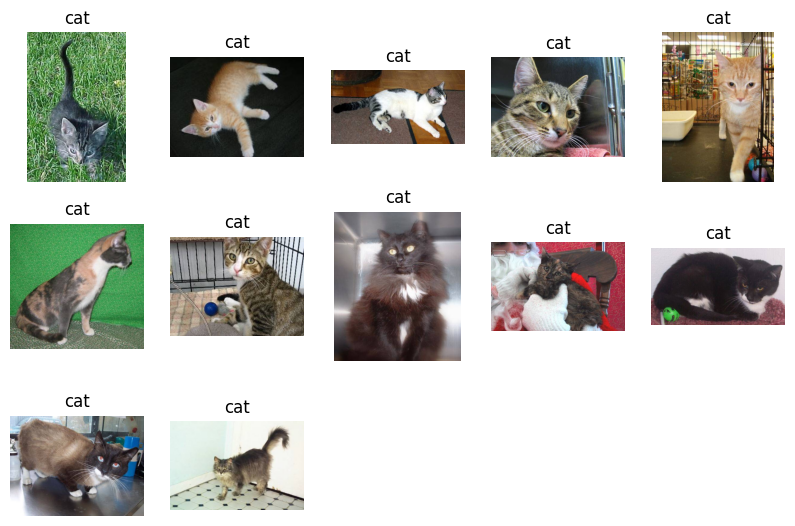

In [76]:
show_images_files(df_pred.loc[gatos_dificiles]["ficheros"], df_pred.loc[gatos_dificiles]["True"].values, train = False)

In [78]:
df_pred.loc[perros_dificiles]

,ficheros,True,Prediction,Confianza
888,dog.9509.jpg,dog,cat,0.999782
749,dog.8979.jpg,dog,cat,0.999679
871,dog.9449.jpg,dog,cat,0.999674
863,dog.9415.jpg,dog,cat,0.998979
772,dog.9068.jpg,dog,cat,0.998876
643,dog.8624.jpg,dog,cat,0.996902
509,dog.8117.jpg,dog,cat,0.996250
851,dog.9346.jpg,dog,cat,0.996001
933,dog.9649.jpg,dog,cat,0.995312
893,dog.9530.jpg,dog,cat,0.995044


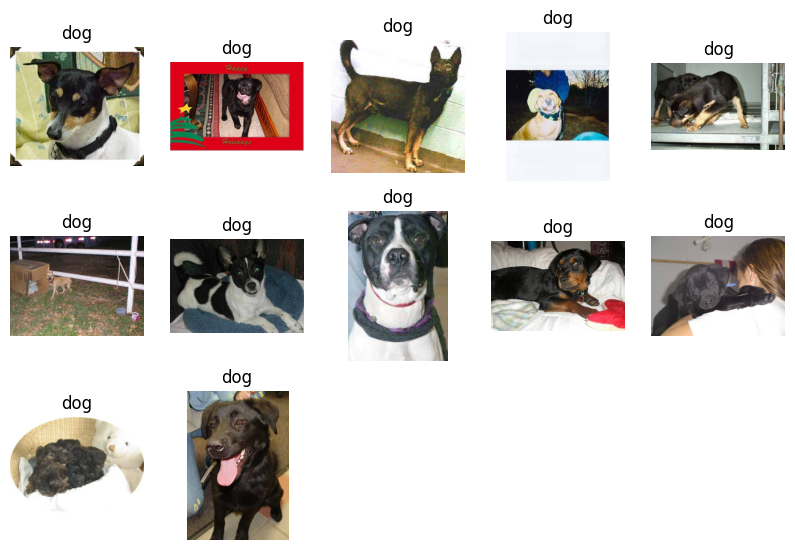

In [79]:
show_images_files(df_pred.loc[perros_dificiles]["ficheros"], df_pred.loc[perros_dificiles]["True"].values, train = False)